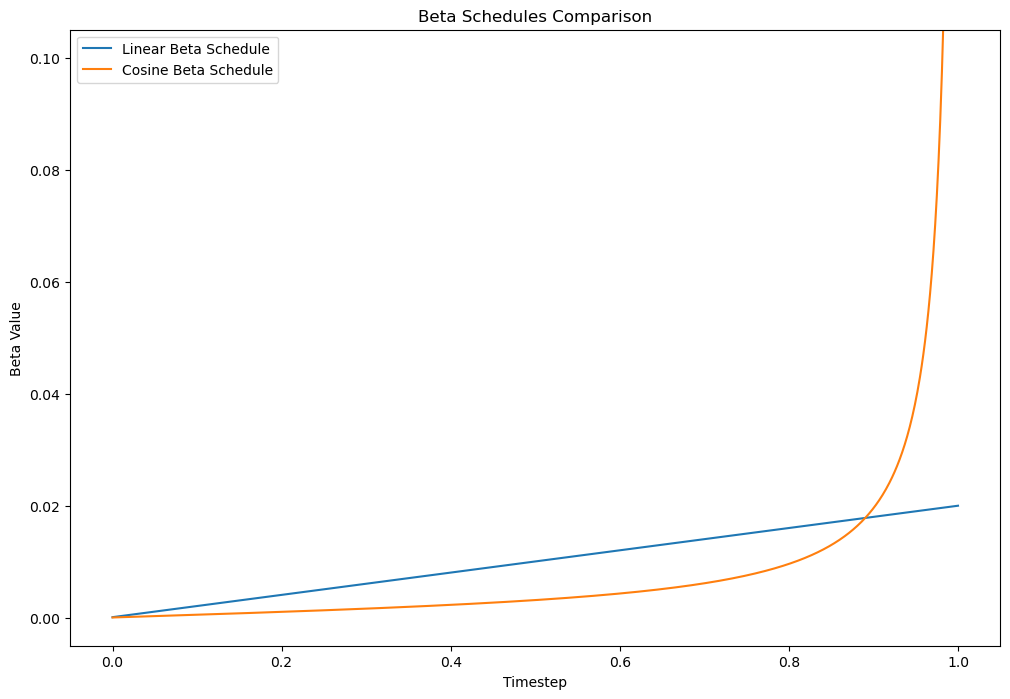

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

def linear_beta_schedule(timesteps):
    """ 1000 步的原始 beta 线性时间表。包含步数缩放机制。"""
    
    scale = 1000 / timesteps
    beta_start = scale * 0.0001
    beta_end = scale * 0.02
    return np.linspace(beta_start, beta_end, timesteps)

def cosine_beta_schedule(timesteps, max_beta=0.999):
    """ beta 余弦时间表。构造更平滑的、收敛更好的噪声序列"""
    
    betas = []
    for i in range(timesteps):
        t1 = i / timesteps
        t2 = (i + 1) / timesteps
        alpha_bar1 = math.cos((t1 + 0.008) / 1.008 * math.pi / 2) ** 2 
        alpha_bar2 = math.cos((t2 + 0.008) / 1.008 * math.pi / 2) ** 2 
        betas.append(min(1 - alpha_bar2 / alpha_bar1, max_beta))
    return np.array(betas)

betas1 = linear_beta_schedule(1000)
betas2 = cosine_beta_schedule(1000)
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 8))
plt.plot(x, betas1, label='Linear Beta Schedule')
plt.plot(x, betas2, label='Cosine Beta Schedule')
plt.title('Beta Schedules Comparison')
plt.xlabel('Timestep')
plt.ylabel('Beta Value')
plt.ylim(-0.005, 0.105)
plt.legend()
# plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn

# 示例张量
target = torch.randn(8, 3, 32, 32)         # 假设 batch_size=8
model_output = torch.randn(8, 3, 32, 32)

# ------------ 手动实现 MSE 计算 ------------
def mean_flat(tensor):
    return tensor.mean(dim=tuple(range(1, tensor.ndim)))  # 按除 batch 以外维度取 mean

loss_per_sample1 = mean_flat((target - model_output) ** 2)  # 逐样本 MSE；shape: [8]
loss1 = loss_per_sample1.mean()  # 再求整体 mean

# ------------ 调用 MSE 函数 ------------
mse = nn.MSELoss(reduction="none")
loss_all = mse(model_output, target)  # shape: [8, 3, 32, 32]
loss_per_sample2 = loss_all.mean(dim=(1, 2, 3))  # 对每个样本求 mean
loss2 = loss_per_sample2.mean()  # 最终整体 loss